___
# <font color=#EEAA11> HW #5: Visualization </font>

### Md Arifuzzaman Faisal

In [1]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/7wTIkbKaCGk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### Note:
I have watched this video menthoned in ICA-5. 

____

## <font color=#00BBFF> Problem #1 (10 pts) </font>

In this problem you are going to explore making a parallel plot using Pandas. In general, the plotting in Pandas is not the best; but, sometimes you just want to do quick EDA only with Pandas without dealing with other libraries.

🤓 Follow these steps:
* pick a dataset and put it into a dataframe,
* make a parallel plot using Pandas's `parallel_coordinates`,
* make at least two versions by choosing how you color the lines, (e.g., coloring by a categorical variable),
* think about what conclusions you would draw about your dataset from these explorations,
* scale the data using a z-score, and remake the parallel plot,
* does the scaling aid in the visualization process? if so, how? if not, why not? (the answer will depend on the dataset you choose! compare two datasets, and not penguins)

____

**If** you want some helper code, look the code below. **If** you use it, comment every line and ensure that it is PEP-8 compliant, and adapt it to your choice of dataset. (You might see if you can use the dataset you plan to use for your project, although it may not make sense in this context.)

Text(0.5, 1.0, 'with zscore')

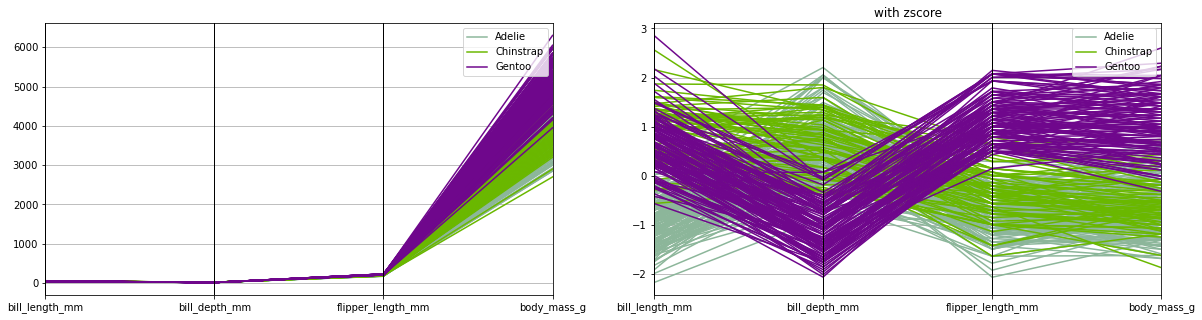

In [2]:
import seaborn as sns
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# choose the penguin dataset
df_p = sns.load_dataset("penguins").dropna()

pd.plotting.parallel_coordinates(df_p[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]], "species", ax=a1)

# another option
#pd.plotting.parallel_coordinates(df_p[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a1)

numeric_cols = df_p.select_dtypes(include=[np.number]).columns

df_p_s = df_p[numeric_cols].apply(zscore)

df_p_s["species"] = df_p["species"]
pd.plotting.parallel_coordinates(df_p_s, "species", ax=a2)
plt.title("with zscore")

#df_p_s["sex"] = df_p["sex"]
#pd.plotting.parallel_coordinates(df_p_s[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a2)


### Parallel plot for `iris` dataset using Pandas

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


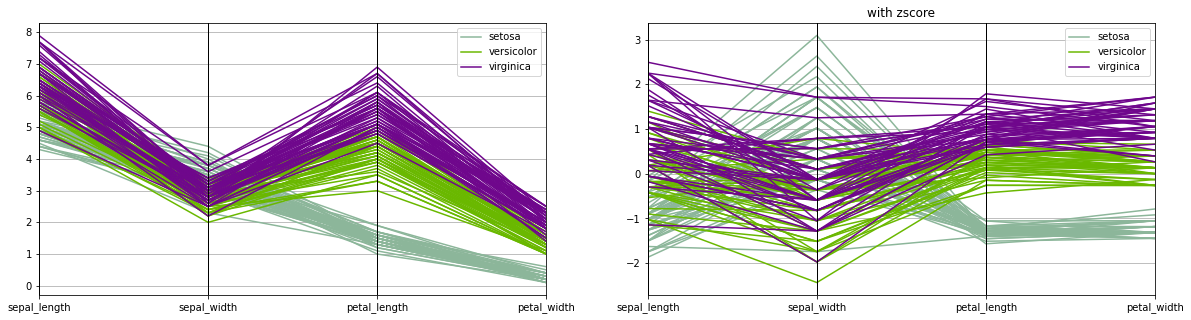

In [3]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

# choose the penguin dataset
iris = sns.load_dataset("iris")
print(iris)

f, (a1, a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# Original parallel plot
pd.plotting.parallel_coordinates(iris[["species", "sepal_length", "sepal_width", "petal_length", "petal_width"]], "species", ax=a1)

numeric_cols = iris.select_dtypes(include=[np.number]).columns

# Apply z-score normalization
data_s = iris[numeric_cols].apply(zscore)
data_s["species"] = iris["species"]

# Parallel plot with z-score normalization
pd.plotting.parallel_coordinates(data_s, "species", ax=a2)
plt.title("with zscore")

plt.show()

### Working with my datase `Water Quality`

             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4    

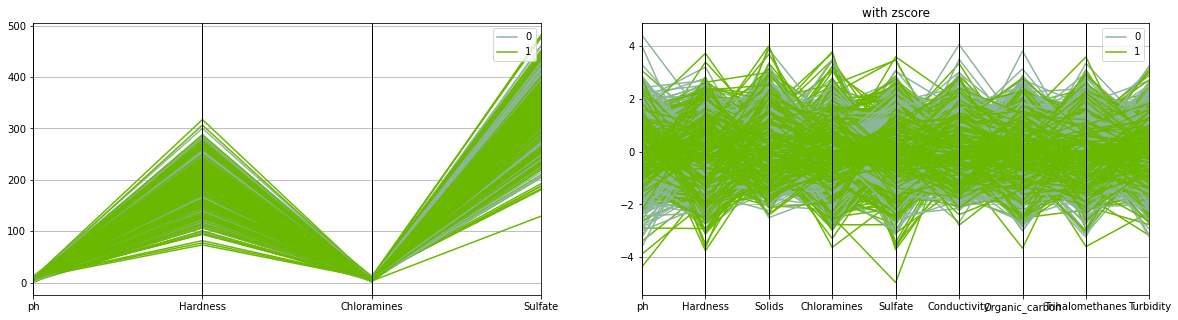

In [4]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import hiplot as hip

# Import the dataset using Pandas
df_water = pd.read_csv('water_potability.csv').dropna()
print(df_water)

f, (a1, a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# Original parallel plot
pd.plotting.parallel_coordinates(df_water[["Potability", "ph", "Hardness", "Chloramines", "Sulfate"]], "Potability", ax=a1)

numeric_cols = df_water.select_dtypes(include=[np.number]).columns

# Apply z-score normalization
data_s = df_water[numeric_cols].apply(zscore)
data_s["Potability"] = df_water["Potability"]

# Parallel plot with z-score normalization
pd.plotting.parallel_coordinates(data_s, "Potability", ax=a2)
plt.title("with zscore")

plt.show()

### Comments
In this example, we're using the Iris dataset. We first load the data, then create a parallel coordinates plot without normalization. Next, we apply z-score normalization to the numeric columns and create another parallel coordinates plot.

The z-score normalization helps in visualizing the relative scales of the features. It can be especially useful when the features have different units or scales. This makes it easier to compare the relationships between variables.

____

## <font color=#00BBFF>  Problem #2 (10) </font>

Next, we are going to compare the previous result with HiPlot, which is a library specifically designed for exploring high-dimensional datasets. It tends to look better, have more features and _-- most importantly for EDA --_ it is interactive.

🤓 Follow these steps:
* install [HiPlot](https://github.com/facebookresearch/hiplot) on your machine,
* read the documentation to understand how to use HiPlot with a dataframe,
* open HiPlot in your notebook with a dataset you explored in the previous problem,
* play with HiPlot so that you know how to use its most important features:
  * how do you select a portion of one of the vertical axes?
  * how do you slide the range box vertically to select different portions of the data?
  * can you select (with the gray boxes) different ranges on different vertical axes?
  * how do you reorder the vertical axes?
  * what use the dataframe below the plot? what happens if you mouse over the rows?
  * for your dataset, set the order of the vertical axes to correspond to a narrative/story, and describe that in a markdown cell - image you are using such a plot for your project and you want to tell a specific story.

If you find HiPlot useful, consider using it in your project. [It works with streamlit.](https://facebookresearch.github.io/hiplot/tuto_streamlit.html)

In [5]:
!pip install -U -qqq hiplot # needed for Google colab
import hiplot as hip
print(f"HiPlot=={hip.__version__}")

HiPlot==0.1.33


In [6]:
hip.Experiment.from_dataframe(df_p).display()

<IPython.core.display.Javascript object>

In [7]:
hip.Experiment.from_dataframe(iris).display()

<IPython.core.display.Javascript object>

In [8]:
hip.Experiment.from_dataframe(df_water).display()

<IPython.core.display.Javascript object>

### Comments
I arranged the axes in this order to highlight the significant differences in petal dimensions across species. This is important in classifying Iris species as certain types may have more distinguishable petal characteristics. Sepal dimensions, on the other hand, may not be as indicative of species.

____

## <font color=#00BBFF>  Problem #3 (30) </font>

It is time to start working on your project!

And, it is time to pay attention to the calendar! Your projects presentations will be the week of Oct. 16, which is only two weeks away. The following week is Fall Break. The next week, the week I am away, we will start diving more into the mathematics of data science.

Hopefully the HWs have prepared you for your project. Here is the schedule:
* just a reminder: I am out of town the week of October 30-November 3, but you'll have a guest instructor on probabilty and statistics; the week will be normal otherwise,
* the next week (October 23 and 24) is Fall Break - we don't meet on Monday of that week,
* your projects are due at the end of that week: in D2L by midnight on Friday, October 27th,
* during the week of Oct. 16, you will present your projects to the other members of your class; the procedure will be:
  * the presentations will happen on Wednesday, October 18th. the order of presentations will be random, so you might be presenting first on that day (be ready and arrive to the class on time! no excuses! 😉),
  * for the presentations, we are going with 12 groups of 4 and 5, which will be announced by Mahyar on the day of presentation,
  * during the presentations, you will listen to some of the presentations and interact (e.g., ask questions) with the person speaking,
  * you will complete a report of the speakers that you listened to and turn that in (to D2L as a pdf file).

So that you have a full, restful Fall Break, there will be no homework that week; and, your midterm project will have been completed the prior week.

Here are the requirements for your project. Note that these requirements may not apply to each student perfectly, because you all have some flexibility in how you design your project. If there are any special issues with your project (e.g., the data is proprietary), please let me know so that we can work with your situation.
* your project will be a streamlit app with two levels of interactivity:
  * in streamlit (e.g., through sliders, dropdowns, etc.),
  * in the visualizations themselves (e.g., using Altair or HiPlot),
  * you must have a goal, a message, a story -- there should be a point to what you are doing,
  * the app should contain any necessary text that aids the user to understand and explore your story,
  * the app should be deployable from your code at Github, and your streamlit link should be sent to Mahyar by Wed before class (do not send the link for the Github repository).

  A good example [is here](https://caron14-streamlit-linearregression-boston-house-prices-m9mvyd.streamlitapp.com) - try to be at least this complete in your app.

  As always, please contact us, or use Slack, with any issues that arise!

  🤓 For this HW, you are going to write an essay that is 500 to 1000 words. Use the [best markdown practices](https://www.markdownguide.org/cheat-sheet/), and put everything in a cell below. (You can use one plot, but no more.) What you will write is a proposal for your project. Include this in your proposal:
  1. What is the goal, what is the point? What is the "big-picture" question you are trying to answer? Who cares? Why do they care?
  2. Discuss which datasets you have looked at toward this goal. Which ones did you reject and why? Which dataset did you finally choose?
  3. Describe the dataset. What is in it? Where did it come from? Are there issues, such as missingness? If so, what type (e.g., MNAR)?
  4. What preliminary studies have you done? Do they look promising?
  5. What will your web app do? How will this be useful to people?
  6. What visualization tools do you plan on using? Why did you choose these? How will they serve the goal you outlined in step 1?
  7. Summarize with why you think this is a project worthy of completing.

  In your writing, use the best rules of English grammar, punctuation and formatting. Be sure you edit the proposal a few times before submitting it. It should be very clear, easy to read and convincing.

  Here is the logic I want you to have. The goal of the project is to present your data to someone else you don't know and who does not know very much about data science. You could imagine a scenario in which you work at a large company and are the data scientist. You are asked to design and build a web app for a mostly non-technical manager with the goal that they engage with the data as a "dashboard", perhaps as a way to report to them on what your team has done and why it is interesting an important. Thus, it is important that you understand the narrative that goes with your data, choose the best visualization to display your ideas, and layout the app in a way that is logical for a user you have never met.
  



# Mid-Term Project Report: Water Quality Dataset Analysis

In [9]:
import pandas as pd
import hiplot as hip

# Import the dataset using Pandas
df_water = pd.read_csv('water_potability.csv')

hip.Experiment.from_dataframe(df_water).display()

<IPython.core.display.Javascript object>

## 1. Project Goal and Big-Picture Question

**Goal:** The main objective of this mid-term project is to conduct a thorough analysis of the `Water Quality` dataset in order to assess the safety of water sources for consumption. Specifically, our aim is to develop a predictive model that can accurately determine the drinkability of water based on various comprehensive water quality parameters.

**Big-Picture Question:** This research aims to determine if a comprehensive analysis of water quality parameters can accurately predict the drinkability of water sources. Additionally, we seek to understand how the findings from this analysis can contribute to addressing the critical concern of ensuring safe drinking water for everyone.

**Importance:** The significance of this project lies in its potential to have a direct impact on public health and well-being. Access to clean and safe drinking water is a basic human right, and by conducting this analysis, we hope to provide valuable insights that can inform water management decisions and help ensure the provision of safe drinking water to communities in need.

## 2. Dataset Selection and Rejection

**Datasets Considered:**
* The `Water Quality`dataset offers comprehensive information on various parameters of water sources, shedding light on potential contaminants and quality levels. By analyzing this dataset, one can gain valuable insights into the state of water resources, enabling informed decision-making for water management and public health protection.
* The `Stroke Prediction` Dataset provides critical insights into factors influencing stroke occurrence, including demographic, health, and lifestyle attributes. Through comprehensive analysis, it offers valuable information for developing effective preventive strategies and healthcare interventions to mitigate stroke risks.
* The `Life Expectancy (WHO) Dataset`, available on Kaggle, offers a comprehensive collection of factors influencing life expectancy worldwide. 

**Rejected Dataset :** `Stroke Prediction`, `Life Expectancy (WHO)`. I find these two datasets intriguing, but this time I am looking for a dataset that includes a wide range of variables. My goal is to explore correlations and gain insights through visualizations. The `Water Quality` dataset appears to be more suitable and relevant for achieving this objective.

**Chosen Dataset :** `Water Quality`

**Reason for Selection:** The `Water Quality` dataset was selected because it directly aligns with the project's goal of assessing water safety for consumption. It offers comprehensive information on water quality parameters, making it ideal for predictive analysis.

## 3. Description of the Dataset

**Content:** 
The `Water Quality` dataset includes information on various parameters of water sources, such as pH, hardness, solids, organic carbon, and more. It also contains a binary target variable, "Potability," indicating whether water is safe for drinking (1) or not (0).

**Source:** https://www.kaggle.com/datasets/adityakadiwal/water-potability

**Issues:**
   - Missing Data: One issue identified during preliminary exploration is the presence of missing data in certain attributes, requiring further investigation to determine the nature of these missing values. Further investigation is needed to understand the nature of these missing data (e.g., Missing Completely at Random, Missing at Random, or Missing Not at Random).

## 4. Preliminary Studies

During the preliminary studies, several key analyses and visualizations were conducted to understand the data and explore potential relationships. The main findings include:

1. **Visualization of Water Quality Parameters**: Hiplot of the dataset will be explored to learn about the data. The distribution of key water quality parameters, such as pH level, sulfur level, chlorine levels, etc., will be visualized. This allows for a better understanding of the range and spread of these parameters in the dataset.

2. **Exploration of Correlations**: Correlations between water contaminants and drinkability will be explored. 


## 5. Web App Functionality

In this project, the web app will be developed using the `Streamlit` framework and will be accessible to all users. The web app will have the following functionality:

1. **Predict Drinkability**: Based on the Water Quality dataset's water quality parameters, the web app will calculate correlations between various contaminants and water drinkability. Users will be able to view the correlation coefficients and identify which contaminants have a significant impact on water drinkability.

2. **Visualizations and Insights**: The web app will provide visualizations and insights into the impact of each water quality parameter on the drinkability prediction.

By utilizing the `Streamlit` framework, the web app will offer a user-friendly interface where users can interact with the data, explore correlations, and gain valuable insights into the factors affecting water drinkability.

## 6. Visualization Tools

For this project, I've selected mainly Seaborn, and some others tools like Matplotlib, pandas, hiplot and altair  as our primary visualization tools. These robust libraries will enable to generate a diverse range of visualizations including histograms, HiPlots, KDE and normal distribution plots, scatter plots, and correlation matrices. These visualizations are essential for gaining a comprehensive understanding of the dataset. They will allow to explore the distribution of data, identify patterns, and uncover relationships between variables. Ultimately, these visualizations will serve as powerful tools to convey our findings and insights effectively to audience.

## 7. Project Significance

This project holds great significance and is worthy of completion for multiple reasons. 

Firstly, it addresses a social concern, which is safe drinking water. Access to safe water is essential for human health and well-being.

Secondly, the analysis of the `Water Quality` dataset has the potential to save lives by identifying unsafe water sources. By using data analysis techniques, the project can detect patterns and indicators of water contamination, allowing for early intervention and prevention measures to be implemented.

Thirdly, the project offers valuable insights for water management and public health protection. By analyzing the dataset, it can provide information on the factors that contribute to water quality issues, enabling authorities and organizations to make informed decisions regarding water treatment, distribution, and policy-making. 

Lastly, the development of a user-friendly web app provides a simple and accessible interface for accessing water drinkability predictions to a wide range of people.

In conclusion, the analysis of the `Water Quality` dataset is not only relevant but also highly significant in addressing a critical public health issue.